In [1]:
import glob
import pylab           as     pl
import pandas          as     pd
import numpy           as     np

from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   astropy.table   import Table, join, vstack
from   legacy          import cutout

# *Dark Energy Spectroscopic Instrument*

Today, we continue the legacy of Slipher, Hubble, Vera Rubin et al. with the DESI survey of *30 Million* galaxies.  That's alot more than Hubble's original 24! 

![title](images/kittpeak.jpg)

To get this many galaxies, we need a telescope big enough to observe very faint galaxies.  With a 4m diameter mirror,  the Mayall Telescope at Kitt Peak is just right.

We need our very own Hubbles, observers to run the telescope for us.  Within DESI, everyone gets a turn at this (whether you're an expert or not!).  Here's Satya in the control room  

![alt](images/satya.jpg)

Straight off the telescope, our data looks pretty unrecognizable:

![title](images/spectra2D.png)

Here you're seeing the light from 500 optical fibers (each collecting the light of one galaxy) packed onto a CCD. The horizontal arches correspond to a given wavelength, with the bright arches corresponding to bright sky lines - a complete nuisance!  

The apparently random tracks are cosmic rays - detections of high energy particles generated in the atmosphere.  

We need to carefully calibrate and clean these images to retrieve the galaxy light we really care about.  Let's assume some smart people have done this for us, and look at the cleaned images of the light of a few DESI galaxies.      

In [38]:
tracers     = ['qso'] # Replace with any of ['mws'], ['bgs'], ['lrg'], ['elg'], ['qso'] here. 

In [39]:
redshifts   = Table()
spectra     = Table()

tiles       = {'mws': 66003, 'bgs': 66003, 'elg': 67230, 'lrg': 68002, 'qso': 68002}

rfiles      = glob.glob('student_andes/zbest-*')
sfiles      = glob.glob('student_andes/coadd-*')

for tracer in tracers:
  rfile     = 'student_andes/zbest-{}-{}-20200315.fits'.format(tracer, tiles[tracer])    
  redshifts = vstack((redshifts, Table.read(rfile)))

  sfile     = 'student_andes/coadd-{}-{}-20200315.fits'.format(tracer, tiles[tracer]) 
  spectra   = vstack((spectra, Table.read(sfile)))
    
print('Number of {} galaxies available: {:d}'.format(tracers[0], len(redshifts)))

Number of qso galaxies available: 5


In [40]:
def Rydberg(n, m):
    # Vacuum wavelengths [nanometres]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

We'll also look to add some markers that indicate the strong lines from Hydrogen (that we learnt about previously) in a few DESI Quasar spectra.

In [41]:
Lya        = 10. * Rydberg(1, 2)

# The Hydrogen Balmer series.
Balmers    = 10. * np.array([Rydberg(2, m) for m in np.arange(6, 3, -1)])
Balmers

array([4105.83941606, 4344.80361488, 4866.18004866])

Text(0.5, 0.91, 'QSO Tracers')

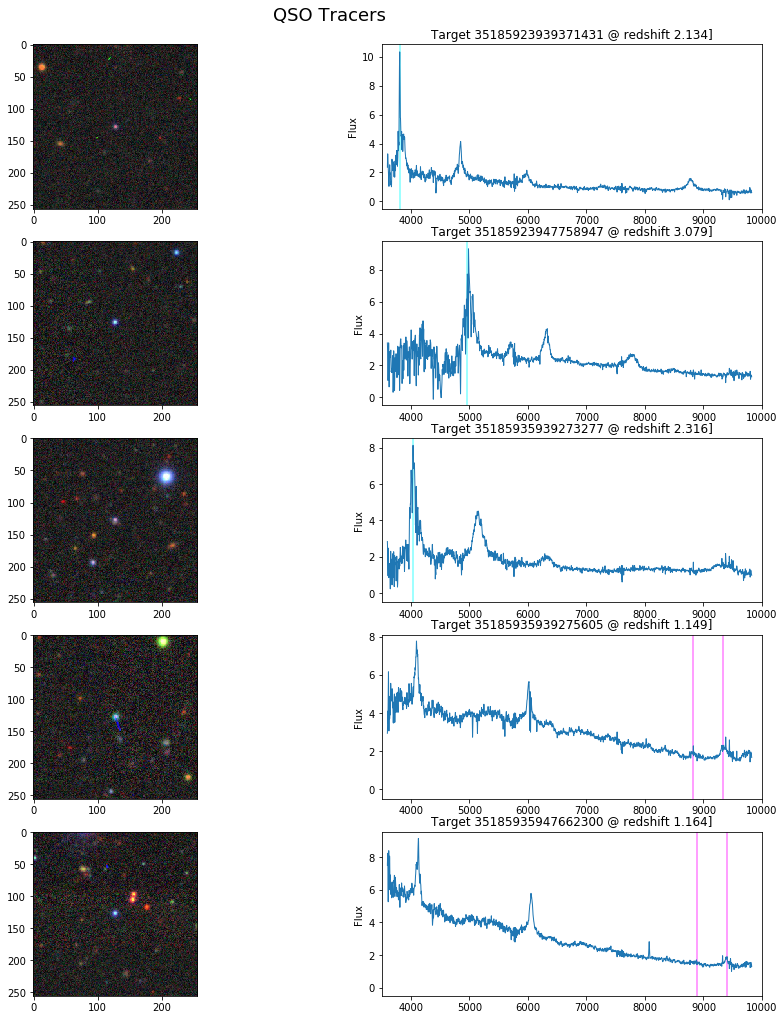

In [42]:
ngal       = 5

fig, axes  = plt.subplots(ngal, 2, figsize=(15., 3.5 * ngal))

for i, tid in enumerate(redshifts['TARGETID'][:ngal]):
  redshift = redshifts['Z'][i]
    
  axes[i,1].axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
  
  for balmer in Balmers:
    axes[i,1].axvline((1. + redshift) * balmer, c='magenta', alpha=0.5)      
    
  axes[i,1].plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
  axes[i,1].set_title('Target {} @ redshift {:.3f}]'.format(tid, redshift))
  
  axes[i,1].set_xlim(3.5e3, 1.e4)
  axes[i,1].set_ylim(bottom=-0.5)

  axes[i,1].set_ylabel('Flux')
    
  cutout(axes[i,0], redshifts['TARGET_RA'][i], redshifts['TARGET_DEC'][i])

fig.suptitle('{} Tracers'.format(tracers[0].upper()), fontsize=18, y=0.91)

Notice how the Hydrogen lines we see are very broad.  This is because the Hydrogen is rapidly moving within this type of galaxy, known as Quasar or "Quasi-stellar object".  They are very distant, but still bright, due to matter accreting onto a large blackhold in their center!  See https://en.wikipedia.org/wiki/Quasar


Excercise:  Try try changing tracer='qso' to tracer ='lrg' in cell [2] above and rerun the cells above to remake these plots for a different type of galaxy.  Remember, you need shift-return to evaluate a cell!  What do you notice is different about the different galaxy tracers and their colors? 

Exercise for experts:  can you try and figure out what lines other than Hydrogen are present here (and plot them)?
You might try the list here for a start: http://classic.sdss.org/dr6/algorithms/linestable.html    